# Load injection - Locust

This notebook studies the impact of clients doing requests for CoAP servers.

In [1]:
import os
cur_dir=os.getcwd() # save current directory to save the generated CSV files

%cd ../../..
%pwd

/home/jovyan/work


'/home/jovyan/work'

## Introduction

This notebook uses the 05-locust-g5k-iotlab.ipynb to evaluate the impact on the response time of different load injections. For that, we vary the number of **users** performing requests to CoAP servers, keeping the other parameters fixed.

Similarly to the 04-load-injection notebook, it is divided in 3 main parts.

- **Description**: creates a data frame containing the description of the different parameters of your experiment. In our case the different number of **users** in the system.
- **Running**: Reads the data frame with the description the experiment and runs each experiment. It uses papermill to call the 05-locust-g5k-iotlab.ipynb notebook with the correct parameters. Also, creates a data frame with the results.
- **Analysis**: Finally, read the output from the running phase and performs the data analysis.

Note that you can run each part **independently**. It only depends on running the first cell of this notebook to set the cur_dir properly.

## Description

Detailing the parameters used in the different experiment runs.

In [3]:
import pandas
import io
import uuid
import datetime

job_name="rsd-hackathon"

experiments=io.StringIO("""
firmware,iotlab_nodes,g5k_nodes,duration,users
contikimac,4,1,300,1
contikimac,4,1,300,10
contikimac,4,1,300,20
contikimac,4,1,300,50
""")
# number of runs
N=3

df = pandas.read_csv(experiments)
# repeat N times each test
df = pandas.concat([df.assign(run=i) for i in range(0,N)], ignore_index=True)

df['exp_id'] = [str(uuid.uuid4()) for _,_ in df.iterrows()]
df['date'] = str(datetime.date.today())
df['data_dir'] = ["data/raw/%s/%s" % (i['date'], i['exp_id']) for _,i in df.iterrows()]
df['notebook_dir'] = ["%s/%s" % (cur_dir, i['exp_id']) for _,i in df.iterrows()]
df['state'] = 'created'

df = df.sample(frac=1).reset_index(drop=True) # randomize test execution
df.to_csv("%s/experiment.csv" % cur_dir)
df

firmware  iotlab_nodes  g5k_nodes  duration  users  run  \
0   contikimac             4          1       300      1    1   
1   contikimac             4          1       300     50    1   
2   contikimac             4          1       300     50    0   
3   contikimac             4          1       300     10    0   
4   contikimac             4          1       300     10    2   
5   contikimac             4          1       300     20    1   
6   contikimac             4          1       300     20    0   
7   contikimac             4          1       300     10    1   
8   contikimac             4          1       300     20    2   
9   contikimac             4          1       300      1    0   
10  contikimac             4          1       300     50    2   
11  contikimac             4          1       300      1    2   

                                  exp_id        date  \
0   33f35771-39cc-4b63-a6a9-87fea7881b20  2021-09-10   
1   a2faaec5-c14c-4a0b-a01b-9dabe2b40a6a  2021-09-10   
2   ec1e3e56-fecf-4a4a-9d29-e5d289217641  2021-09-10   
3   5da2dd39-937e-47e7-9908-59fc902aae49  2021-09-10   
4   c9d092fc-0049-4574-9f5a-fa499f7901d3  2021-09-10   
5   028aa565-fbad-481a-9550-b6766cdb20b1  2021-09-10   
6   c5138853-db85-4ec9-87a0-9c483ed3c821  2021-09-10   
7   6f223fc3-523a-4ff2-b852-df1bf209b9b3  2021-09-10   
8   74fb49e9-b998-4109-a295-a62557956af0  2021-09-10   
9   4bf64487-ccb6-405d-aa89-0f92447dec3b  2021-09-10   
10  d4b916e6-30c0-403e-9666-882d9eb25e70  2021-09-10   
11  18829dfe-7c80-47ad-8a6c-09d1d0fa2bb3  2021-09-10   

                                             data_dir  \
0   data/raw/2021-09-10/33f35771-39cc-4b63-a6a9-87...   
1   data/raw/2021-09-10/a2faaec5-c14c-4a0b-a01b-9d...   
2   data/raw/2021-09-10/ec1e3e56-fecf-4a4a-9d29-e5...   
3   data/raw/2021-09-10/5da2dd39-937e-47e7-9908-59...   
4   data/raw/2021-09-10/c9d092fc-0049-4574-9f5a-fa...   
5   data/raw/2021-09-10/028aa565-fbad-481a-9550-b6...   
6   data/raw/2021-09-10/c5138853-db85-4ec9-87a0-9c...   
7   data/raw/2021-09-10/6f223fc3-523a-4ff2-b852-df...   
8   data/raw/2021-09-10/74fb49e9-b998-4109-a295-a6...   
9   data/raw/2021-09-10/4bf64487-ccb6-405d-aa89-0f...   
10  data/raw/2021-09-10/d4b916e6-30c0-403e-9666-88...   
11  data/raw/2021-09-10/18829dfe-7c80-47ad-8a6c-09...   

                                         notebook_dir    state  
0   /home/jovyan/analysis/06-load-injection-locust...  created  
1   /home/jovyan/analysis/06-load-injection-locust...  created  
2   /home/jovyan/analysis/06-load-injection-locust...  created  
3   /home/jovyan/analysis/06-load-injection-locust...  created  
4   /home/jovyan/analysis/06-load-injection-locust...  created  
5   /home/jovyan/analysis/06-load-injection-locust...  created  
6   /home/jovyan/analysis/06-load-injection-locust...  created  
7   /home/jovyan/analysis/06-load-injection-locust...  created  
8   /home/jovyan/analysis/06-load-injection-locust...  created  
9   /home/jovyan/analysis/06-load-injection-locust...  created  
10  /home/jovyan/analysis/06-load-injection-locust...  created  
11  /home/jovyan/analysis/06-load-injection-locust...  created

## Running

In [4]:
import papermill as pm
import pathlib
import pandas

# read the description of the experiment
df = pandas.read_csv("%s/experiment.csv" % cur_dir)
for index, exp in df.iterrows():
    # run only recently created experiments
    if exp['state'] != 'created':
        continue

    print("Running experiment number: %d, ID: %s, firmware: %s, number of users: %d" % (index, exp['exp_id'], exp['firmware'], exp['users']))
    pathlib.Path(exp['notebook_dir']).mkdir(exist_ok=True, parents=True)

    pm.execute_notebook(
        'analysis/05-locust/05-locust-g5k-iotlab.ipynb',
        '%s/06-load-injection-locust-%d-%s.ipynb' % (exp['notebook_dir'], exp['users'], exp['exp_id']),
        cwd = "analysis/05-locust",  # going back to folder to execute notebook
        parameters = dict(
            output_dir = exp['data_dir'],
            er_image = "data/firmware/%s/er-example-server.iotlab-m3" % exp['firmware'],
            br_image = "data/firmware/%s/border-router.iotlab-m3" % exp['firmware'],
            free_resources = False if index < len(df.index) - 1 else True, #free resources in last experiment
            duration = exp['duration'],
            users = exp['users'],
            iotlab_nodes = exp['iotlab_nodes'],
            iotlab_site = 'grenoble',
            g5k_nodes = exp['g5k_nodes'],
        )
    )
    
    # change and save new state
    df.at[index, 'state'] = 'executed'
    df.to_csv("%s/experiment.csv" % cur_dir)


Running experiment number: 6, ID: c5138853-db85-4ec9-87a0-9c483ed3c821, firmware: contikimac, number of users: 20


Executing:   0%|          | 0/54 [00:00<?, ?cell/s]

Running experiment number: 7, ID: 6f223fc3-523a-4ff2-b852-df1bf209b9b3, firmware: contikimac, number of users: 10


Executing:   0%|          | 0/54 [00:00<?, ?cell/s]

Running experiment number: 8, ID: 74fb49e9-b998-4109-a295-a62557956af0, firmware: contikimac, number of users: 20


Executing:   0%|          | 0/54 [00:00<?, ?cell/s]

Running experiment number: 9, ID: 4bf64487-ccb6-405d-aa89-0f92447dec3b, firmware: contikimac, number of users: 1


Executing:   0%|          | 0/54 [00:00<?, ?cell/s]

Running experiment number: 10, ID: d4b916e6-30c0-403e-9666-882d9eb25e70, firmware: contikimac, number of users: 50


Executing:   0%|          | 0/54 [00:00<?, ?cell/s]

Running experiment number: 11, ID: 18829dfe-7c80-47ad-8a6c-09d1d0fa2bb3, firmware: contikimac, number of users: 1


Executing:   0%|          | 0/54 [00:00<?, ?cell/s]

Parse and save results.

In [6]:
import pandas
import os.path

# where to save the results from experiment
results_filename = "%s/results.csv" % cur_dir
out = None
results_full_filename = "%s/results_full.csv" % cur_dir
out_full = None


# read the description of the experiment
df = pandas.read_csv("%s/experiment.csv" % cur_dir)
for index, exp in df.iterrows():
    if exp['state'] != 'executed':
        continue

    # read and save output of this test
    temp = pandas.read_csv(exp['data_dir'] + "/enoslib_stats.csv")
    temp['exp_id'] = exp['exp_id']
    temp['users'] = exp['users']
    temp['run'] = exp['run']    
    out = pandas.concat([out, temp])
    
    temp = pandas.read_csv(exp['data_dir'] + "/enoslib_stats_history.csv")
    temp['exp_id'] = exp['exp_id']
    temp['users'] = exp['users']
    temp['run'] = exp['run']
    out_full = pandas.concat([out_full, temp])
    
out.to_csv(results_filename)
out_full.to_csv(results_full_filename)    

## Analysis

Read dataframe with the results of all experiments.

Locust already gives us aggregated results about main metrics. Let's use them.

In [2]:
%load_ext rpy2.ipython
import pandas

out = pandas.read_csv("%s/results.csv" % cur_dir)
out_full = pandas.read_csv("%s/results_full.csv" % cur_dir)
out

Unnamed: 0        Type                                           Name  \
0            0  coapclient  [2001:660:5307:3142::b679]:5683/sensors/gyros   
1            1         NaN                                     Aggregated   
2            0  coapclient  [2001:660:5307:3142::a172]:5683/sensors/gyros   
3            1  coapclient  [2001:660:5307:3142::a269]:5683/sensors/gyros   
4            2  coapclient  [2001:660:5307:3142::b679]:5683/sensors/gyros   
5            3         NaN                                     Aggregated   
6            0  coapclient  [2001:660:5307:3142::a172]:5683/sensors/gyros   
7            1  coapclient  [2001:660:5307:3142::a269]:5683/sensors/gyros   
8            2  coapclient  [2001:660:5307:3142::b679]:5683/sensors/gyros   
9            3         NaN                                     Aggregated   
10           0  coapclient  [2001:660:5307:3142::a172]:5683/sensors/gyros   
11           1  coapclient  [2001:660:5307:3142::a269]:5683/sensors/gyros   
12           2  coapclient  [2001:660:5307:3142::b679]:5683/sensors/gyros   
13           3         NaN                                     Aggregated   
14           0  coapclient  [2001:660:5307:3142::a172]:5683/sensors/gyros   
15           1  coapclient  [2001:660:5307:3142::a269]:5683/sensors/gyros   
16           2         NaN                                     Aggregated   
17           0  coapclient  [2001:660:5307:3142::a172]:5683/sensors/gyros   
18           1  coapclient  [2001:660:5307:3142::a269]:5683/sensors/gyros   
19           2  coapclient  [2001:660:5307:3142::b679]:5683/sensors/gyros   
20           3         NaN                                     Aggregated   
21           0  coapclient  [2001:660:5307:3142::a172]:5683/sensors/gyros   
22           1  coapclient  [2001:660:5307:3142::a269]:5683/sensors/gyros   
23           2  coapclient  [2001:660:5307:3142::b679]:5683/sensors/gyros   
24           3         NaN                                     Aggregated   
25           0  coapclient  [2001:660:5307:3142::a172]:5683/sensors/gyros   
26           1  coapclient  [2001:660:5307:3142::a269]:5683/sensors/gyros   
27           2  coapclient  [2001:660:5307:3142::b679]:5683/sensors/gyros   
28           3         NaN                                     Aggregated   
29           0  coapclient  [2001:660:5307:3142::a172]:5683/sensors/gyros   
30           1  coapclient  [2001:660:5307:3142::a269]:5683/sensors/gyros   
31           2  coapclient  [2001:660:5307:3142::b679]:5683/sensors/gyros   
32           3         NaN                                     Aggregated   
33           0  coapclient  [2001:660:5307:3142::a172]:5683/sensors/gyros   
34           1         NaN                                     Aggregated   
35           0  coapclient  [2001:660:5307:3142::a172]:5683/sensors/gyros   
36           1  coapclient  [2001:660:5307:3142::a269]:5683/sensors/gyros   
37           2  coapclient  [2001:660:5307:3142::b679]:5683/sensors/gyros   
38           3         NaN                                     Aggregated   
39           0  coapclient  [2001:660:5307:3142::a269]:5683/sensors/gyros   
40           1         NaN                                     Aggregated   

    Request Count  Failure Count  Median Response Time  Average Response Time  \
0             271              0                   100             106.084871   
1             271              0                   100             106.084871   
2            1859              0                   820            1414.370091   
3            2415              0                   970            1422.696066   
4            1017              0                   800            2407.879056   
5            5291              0                   890            1609.135891   
6             847              0                   910            3789.061393   
7            2205              0                   850            1251.539683   
8            1953              0        

### Number of NOK requests

In [3]:
%%R -i out
library(dplyr)
library(ggplot2)

out %>% group_by(Name) %>% filter(Type == "coapclient") %>% select(`Failure Count`)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Want to understand how all the pieces fit together? Read R for Data
Science: https://r4ds.had.co.nz/



Adding missing grouping variables: `Name`
# A tibble: 29 x 2
# Groups:   Name [3]
   Name                                          `Failure Count`
   <chr>                                                   <int>
 1 [2001:660:5307:3142::b679]:5683/sensors/gyros               0
 2 [2001:660:5307:3142::a172]:5683/sensors/gyros               0
 3 [2001:660:5307:3142::a269]:5683/sensors/gyros               0
 4 [2001:660:5307:3142::b679]:5683/sensors/gyros               0
 5 [2001:660:5307:3142::a172]:5683/sensors/gyros               0
 6 [2001:660:5307:3142::a269]:5683/sensors/gyros               0
 7 [2001:660:5307:3142::b679]:5683/sensors/gyros               0
 8 [2001:660:5307:3142::a172]:5683/sensors/gyros               0
 9 [2001:660:5307:3142::a269]:5683/sensors/gyros               0
10 [2001:660:5307:3142::b679]:5683/sensors/gyros               0
# … with 19 more rows


### 'Mean response time' against 'Number of clients'

Plot mean response time and the individual response time for each sensor in each run.

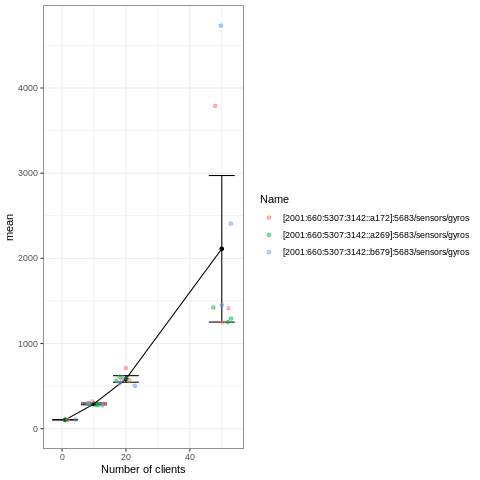

In [4]:
%%R -i out

out %>% filter(Name != "Aggregated") %>% group_by(users) %>% summarize(mean = mean(`Average Response Time`), sd = sd(`Average Response Time`), se = sd/sqrt(n())) %>%
ggplot(aes(users, mean)) + geom_point() + geom_line() +
    geom_errorbar(aes(ymin=mean - 2*se, ymax= mean + 2*se)) +
    geom_jitter(data=out[out$Name != "Aggregated",], aes(users, `Average Response Time`, color=Name), alpha=.5) +
    xlab("Number of clients") + ylim(0, NA) + theme_bw()

It seems to have some outliers, maybe we need to dig into them to verify.

Plot the same information but using the aggregated data provided by locust. 

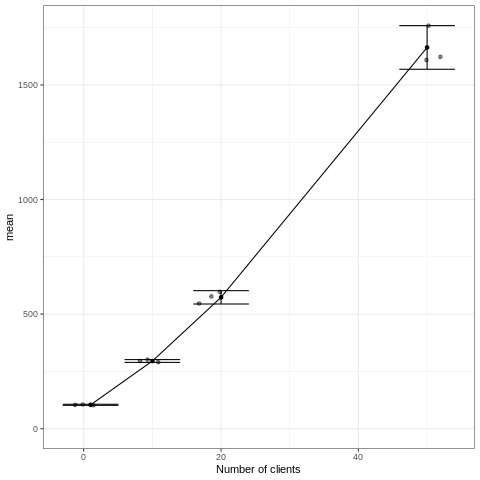

In [5]:
%%R -i out

out %>% filter(Name == "Aggregated") %>% group_by(users) %>% summarize(mean = mean(`Average Response Time`), sd = sd(`Average Response Time`), se = sd/sqrt(n())) %>%
ggplot(aes(users, mean)) + geom_point() + geom_line() +
    geom_errorbar(aes(ymin=mean - 2*se, ymax= mean + 2*se)) +
    geom_jitter(data=out[out$Name == "Aggregated",], aes(users, `Average Response Time`), alpha=.5) +
    xlab("Number of clients") + ylim(0, NA) + theme_bw()

We can see that the mean is different using the aggregated data from the simple average of each sensor.

This happens because Locust considers the number of requests done to each sensor to calculate the average.

Let's redo our plot changing the way we calculate the mean average time. We can notice that now the mean is close to the aggregated value givin by locust.

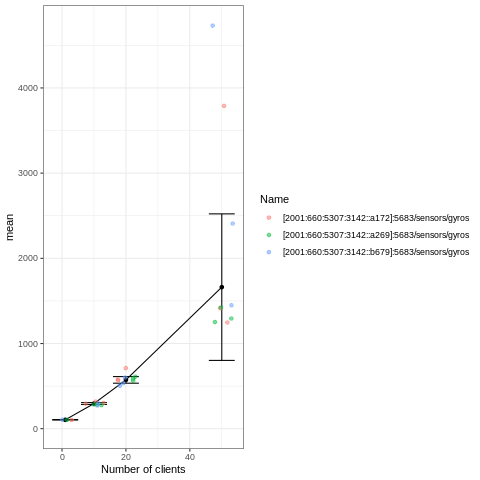

In [6]:
%%R -i out
library(ggplot2)

out %>% filter(Name != "Aggregated") %>% group_by(users) %>% summarize(mean = sum(`Average Response Time`*`Request Count`)/sum(`Request Count`), sd = sd(`Average Response Time`), se = sd/sqrt(n())) %>%
ggplot(aes(users, mean)) + geom_point() + geom_line() +
    geom_errorbar(aes(ymin=mean - 2*se, ymax= mean + 2*se)) +
    geom_jitter(data=out[out$Name != "Aggregated",], aes(users, `Average Response Time`, color=Name), alpha=.5) +
    xlab("Number of clients") + ylim(0, NA) + theme_bw()

### Response time ($R$) against $\lambda$

Locust gives us the effective $\lambda$ of the system. Let's plot it versus our average response time.

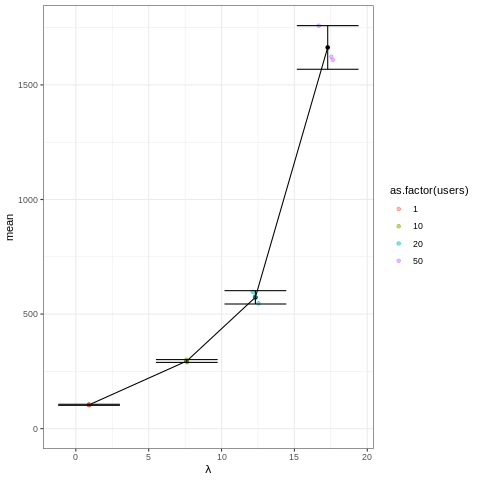

In [7]:
%%R -i out
out %>% filter(Name == "Aggregated") %>% group_by(users) %>% summarize(lambda = mean(`Requests/s`), mean = mean(`Average Response Time`), sd = sd(`Average Response Time`), se = sd/sqrt(n())) %>%
ggplot(aes(lambda, mean)) + geom_point() + geom_line() +
    geom_point(data=out[out$Name == "Aggregated",], aes(`Requests/s`, `Average Response Time`, color=as.factor(users)), alpha=.5) +
    geom_errorbar(aes(ymin=mean - 2*se, ymax= mean + 2*se)) +
    xlab(expression(lambda)) + ylim(0, NA) + theme_bw()

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



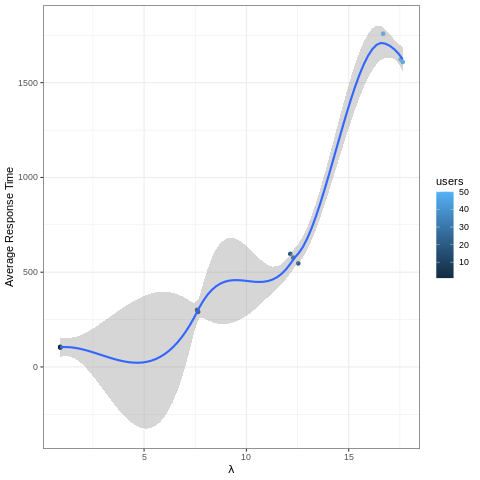

In [8]:
%%R -i out
out %>% filter(Name == "Aggregated") %>% # group_by(users) %>% summarize(lambda = mean(`Requests/s`), mean = mean(`Average Response Time`), sd = sd(`Average Response Time`), se = sd/sqrt(n())) %>%
ggplot(aes(`Requests/s`, `Average Response Time`, color=users)) + geom_point() +
    geom_smooth() +
    xlab(expression(lambda)) + theme_bw()

### $1/R$ against $\lambda$

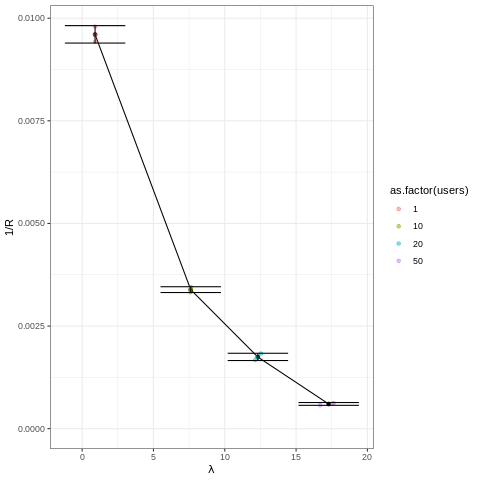

In [9]:
%%R -i out

out %>% filter(Name == "Aggregated") %>% group_by(users) %>% summarize(lambda = mean(`Requests/s`), mean = mean(`Average Response Time`), sd = sd(`Average Response Time`), se = sd/sqrt(n())) %>%
ggplot(aes(lambda, 1/mean)) + geom_point() + geom_line() +
    geom_point(data=out[out$Name == "Aggregated",], aes(`Requests/s`, 1/`Average Response Time`, color=as.factor(users)), alpha=.5) +
    geom_errorbar(aes(ymin=1/(mean - 2*se), ymax=1/(mean + 2*se))) +
    ylab(expression("1/R")) + xlab(expression(lambda)) + ylim(0, NA) + theme_bw()

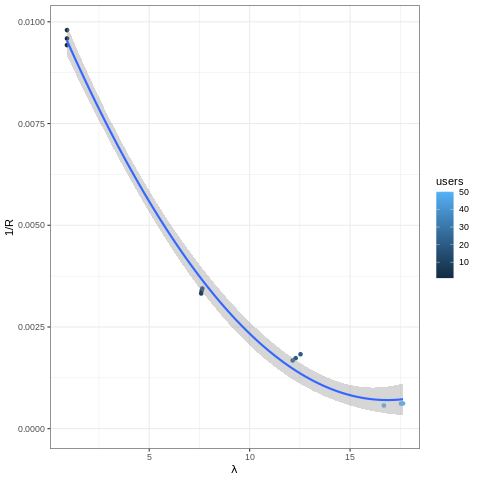

In [10]:
%%R -i out

out %>% filter(Name == "Aggregated") %>%
ggplot(aes(`Requests/s`, 1/`Average Response Time`, color=users)) + geom_point() +
    geom_smooth(method="lm", formula="y~poly(x,2)") +
    ylab(expression("1/R")) + xlab(expression(lambda)) + ylim(0, NA) + theme_bw()

### 1/R - Models

Using a simple linear model (M/M/1).

In [11]:
%%R -i out

model = lm("1/`Average Response Time` ~ `Requests/s`", data=out[out$Name == "Aggregated",])
summary(model)


Call:
lm(formula = "1/`Average Response Time` ~ `Requests/s`", data = out[out$Name == 
    "Aggregated", ])

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0015731 -0.0009057  0.0001342  0.0010739  0.0012542 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.037e-03  6.464e-04  13.979 6.87e-08 ***
`Requests/s` -5.457e-04  5.727e-05  -9.528 2.47e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001199 on 10 degrees of freedom
Multiple R-squared:  0.9008,	Adjusted R-squared:  0.8909 
F-statistic: 90.79 on 1 and 10 DF,  p-value: 2.471e-06



Using poly to consider variance.

In [12]:
%%R -i out

model = lm("1/`Average Response Time` ~ poly(`Requests/s`, 2)", data=out[out$Name == "Aggregated",])
summary(model)


Call:
lm(formula = "1/`Average Response Time` ~ poly(`Requests/s`, 2)", 
    data = out[out$Name == "Aggregated", ])

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0003642 -0.0001537 -0.0001031  0.0002162  0.0004766 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.835e-03  8.261e-05   46.42 5.00e-12 ***
poly(`Requests/s`, 2)1 -1.143e-02  2.862e-04  -39.93 1.93e-11 ***
poly(`Requests/s`, 2)2  3.694e-03  2.862e-04   12.91 4.12e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0002862 on 9 degrees of freedom
Multiple R-squared:  0.9949,	Adjusted R-squared:  0.9938 
F-statistic: 880.6 on 2 and 9 DF,  p-value: 4.763e-11



### 1/R - Further analysis

We have an idea of the shape of the curve (M/G/1).

Use less points to try to estimate it.

In [13]:
%%R -i out

df_r = out %>% filter(Name == "Aggregated") %>% 
   filter(users == 1 | users == 20) %>%
   mutate(inv_r=1/`Average Response Time`) %>% select(inv_r, `Requests/s`)
df_r[nrow(df_r) + 1,] = c(0,20) # what lambda is 1/R=0? We don't know exactly
df_r
model = lm("inv_r ~ poly(`Requests/s`, 2)", data=df_r)
summary(model)


Call:
lm(formula = "inv_r ~ poly(`Requests/s`, 2)", data = df_r)

Residuals:
         1         20         24         32         34         40          7 
-1.782e-04 -1.433e-04  1.706e-04 -2.474e-05  1.933e-04 -1.288e-05 -4.835e-06 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             4.865e-03  6.535e-05   74.44 1.95e-07 ***
poly(`Requests/s`, 2)1 -1.068e-02  1.729e-04  -61.79 4.11e-07 ***
poly(`Requests/s`, 2)2  2.456e-03  1.729e-04   14.20 0.000143 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0001729 on 4 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.9985 
F-statistic:  2010 on 2 and 4 DF,  p-value: 9.88e-07



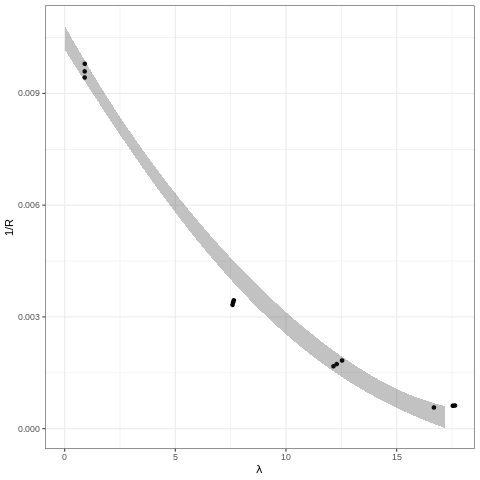

In [14]:
%%R -i out

pred_df = data.frame("Requests/s"=seq(from=0,to=20, length.out=100))
names(pred_df) = c("Requests/s") # :(

pred_df = cbind(pred_df, predict(model, pred_df, interval="confidence"))
pred_df$`Average Response Time`=1/pred_df$fit
pred_df = pred_df[pred_df$lwr>0,] # remove negative points, we don't have negative response times...

out %>% filter(Name == "Aggregated") %>%
ggplot(aes(`Requests/s`, 1/`Average Response Time`)) + geom_point() +
    geom_ribbon(data = pred_df, aes(ymin=lwr, ymax=upr, y=fit), alpha=.3) +
    ylab(expression("1/R")) + xlab(expression(lambda)) + ylim(0, NA) + theme_bw()



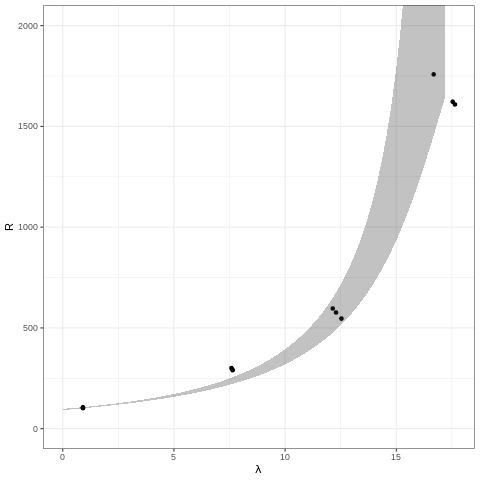

In [16]:
%%R -i out

out %>% filter(Name == "Aggregated") %>%
ggplot(aes(`Requests/s`, `Average Response Time`)) + geom_point() +
    geom_ribbon(data = pred_df, aes(ymin=1/lwr, ymax=1/upr, y=1/fit), alpha=.3) +
    ylab(expression("R")) + xlab(expression(lambda)) + coord_cartesian(ylim=c(0,2000)) + 
#    geom_smooth(method="lm", formula="y~poly(x,2)") +
    theme_bw()